In [345]:
# meeting prasaana sir
# Puzzle words
# Generative AI for feature Selection basic ah oru step implement paniko  GenAi|fuzzy|Genetic alg
# Keep backup of Verison 1
# Work on version 2 by copy of verison 1
# 2 steps : Complete version 1 by doing the all process of getting the accuracy and completing the model
# Main claim : Mathematical model , Generative Ai, Fuzzy.



# Advantages:
## all threshold values are dynamic depeding on the Dataset
## Dimenisionailty reduction showcase
## Accuracy level was very high as well as the performance



# Classification of Dataset ... numerical ,non numerical,

In [346]:
# Genetic Algorithm for Randomised Data
# Fuzzy Logic
# PCA
# To choose that using machine learning to automate the process


In [347]:
# Papers
## 

In [348]:
#  meeting two
# Timings
# all parameters of cm


In [349]:
from timeit import default_timer as timer
import time
import numpy as np
import pandas as pd
from math import isnan
from sklearn import preprocessing
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from loguru import logger
import warnings
warnings.filterwarnings('ignore')

class PreProcessor:
   
    def __init__(self):
        self.unique_count = 1
        self.start_time=time.time()
    
    def RemoveIrrelevantColumn(self,df):
        #regex expressions for various formats of dates
        start_time=time.time()
        regex_patterns = [
        r'\b\d{4}-\d{2}-\d{2}\b',
        r'\b\d{2}[/-]\d{2}[/-]\d{4}\b',
        r'\b\d{2}[/-]\d{2}[/-]\d{4}\b',
        r'\b\d{4}/\d{2}/\d{2}\b',
        r'\b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s+\d{1,2},\s+\d{4}\b',
        r'\b\d{1,2}\s+(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s+\d{4}\b',
        r'\b\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}\b',
        r'\b\d{10,13}\b',
        r'\b(?:Monday|Tuesday|Wednesday|Thursday|Friday|Saturday|Sunday),\s+(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s+\d{1,2},\s+\d{4}\b',
        r'\b\d{1,2}(?:st|nd|rd|th)\s+(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s+\d{4}\b'
        ]
        count=0
        for column in df.columns:
            if df[column].nunique(dropna=True)==self.unique_count:
                print(f'Column :{column} is removed')
                count=count+1
                df=df.drop(column,axis=1)
        print(f'{count} irrelavant columns found.')
        columns_to_remove = []
    
        for column in df.columns:
            # Check if any value in the column matches any regex pattern
            if any(df[column].astype(str).str.match(pattern).any() for pattern in regex_patterns):
                columns_to_remove.append(column)
        df = df.drop(columns=columns_to_remove)
        end_time=time.time()
        time_elp= end_time-start_time
        print(f'Execution time for RemoveIrrelevantColumn is {time_elp} seconds')
        
        return df

        

    def HandlingMissingData(self,df,num_strategy='most_frequent',cat_strategy='knn',n_neighbors=3,null_threshold=0.1):
        start_time=time.time()
        num_cols = df.select_dtypes(include=np.number).columns
        cat_cols = [column for column in df.columns if column not in num_cols]
        
        for column in num_cols:
            null_val=df[column].isnull().mean()
            if(null_val!=0 and null_val<=null_threshold):
                print(f'{null_val}% NaN values found on column: {column}')
                df=df.dropna(subset=[column])
                df= df.reset_index(drop=True)

        imputer=None
        if(num_strategy=='knn'):
            imputer = KNNImputer(n_neighbors=n_neighbors)
        else:
            if num_strategy in ['mean','median','mode','most_frequent']:
                imputer = SimpleImputer(strategy=num_strategy)
            else:
                print('Invalid imputer strategy specified :{}\nDefault strategy Mean is applied',num_strategy)
                imputer = SimpleImputer(strategy='mean')
        print('imputation process started...')
        for feature in num_cols:
            if df[feature].isna().sum().sum() != 0:
                try:
                    df_imputed = pd.DataFrame(imputer.fit_transform(np.array(df[feature]).reshape(-1, 1)))
                    if (df[feature].fillna(-9999) % 1  == 0).all():
                        df[feature] = df_imputed
                        # round back to INTs, if original data were INTs
                        df[feature] = df[feature].round()
                        df[feature] = df[feature].astype('Int64')                                        
                    else:
                        df[feature] = df_imputed
                except:
                    print('imputation failed for feature "{}"',feature)
        if(cat_strategy=='knn'):
            imputer = KNNImputer(n_neighbors=n_neighbors)
        elif(cat_strategy=='logreq'):
            df = PreProcessor.LogisticRegressionImputer(
                columns=cat_cols,
                df=df
            )
            return df
        else:
            imputer = SimpleImputer(strategy='most_frequent')
        
        for feature in cat_cols:
            if df[feature].isna().sum()!= 0:
                try:
                    mapping = dict()
                    mappings = {k: i for i, k in enumerate(df[feature].dropna().unique(), 0)}
                    mapping[feature] = mappings
                    df[feature] = df[feature].map(mapping[feature])

                    df_imputed = pd.DataFrame(imputer.fit_transform(np.array(df[feature]).reshape(-1, 1)), columns=[feature])    

                    # round to integers before mapping back to original values
                    df[feature] = df_imputed
                    df[feature] = df[feature].round()
                    df[feature] = df[feature].astype('Int64')  

                    # map values back to original
                    mappings_inv = {v: k for k, v in mapping[feature].items()}
                    df[feature] = df[feature].map(mappings_inv)
                except:
                    print('Imputation failed for feature "{}"',  feature)
        end_time=time.time()    
        time_elp= end_time-start_time
        print(f'Execution time for HandlingMissingData is {time_elp} seconds')
        return df
    
    
    def normalization(self,df):
        sc = StandardScaler()
        normalize_columns = []
        for column in df.columns:
            if (df[column].dtype == 'int64' or df[column].dtype == 'float64') and df[column].nunique() > 10:
                normalize_columns.append(column)
        df[normalize_columns] = sc.fit_transform(df[normalize_columns])
        # Is normalization Done well
        normalized_feature = df[normalize_columns]
        mean_normalized = np.mean(normalized_feature)
        std_dev_normalized = np.std(normalized_feature)
        print("Mean of normalized feature:", mean_normalized)
        print("Standard deviation of normalized feature:", std_dev_normalized)
        return df
    
    
    
    
    def encoding(self,df):   
        start_time=time.time()
        lable_encoder = preprocessing.LabelEncoder()
        object_columns = []
        for column in df.columns:
                if df[column].dtype == 'object' and df[column].nunique()<3: #binary 
                    df[column]=lable_encoder.fit_transform(df[column])
                    object_columns.append(column)
                elif df[column].dtype == 'object' and (df[column].nunique()>2): #Multi-class 
                    df[column]=lable_encoder.fit_transform(df[column])
                    object_columns.append(column)
                elif df[column].dtype == 'bool':
                    df[column]=lable_encoder.fit_transform(df[column])
                    object_columns.append(column)
                else:
                    pass
        
        end_time=time.time()
        time_elp= end_time-start_time
        print("Encoding process completed! It returns df and Object-col-list")
        print(f'Execution time for encoding is {time_elp} seconds') 
        total_time_elp= end_time-self.start_time
        print(f'Total Execution time for Preprocessing is {total_time_elp} seconds')     
        
        return df,object_columns,total_time_elp
    
    
    
        
    def LogisticRegressionImputer(self,columns,df):
             for feature in columns:
                 try:
                     test_df = df[df[feature].isnull()==True].dropna(subset=[x for x in df.columns if x != feature])
                     train_df = df[df[feature].isnull()==False].dropna(subset=[x for x in df.columns if x != feature])
                     if len(test_df.index) != 0:
                         pipe = make_pipeline(StandardScaler(), LogisticRegression())  
                         y = train_df[feature]
                         train_df.drop(feature, axis=1, inplace=True)
                         test_df.drop(feature, axis=1, inplace=True)   
                         model = pipe.fit(train_df, y)
                       
                         pred = model.predict(test_df) # predict values
                         test_df[feature]= pred
                         if (df[feature].fillna(-9999) % 1  == 0).all():
                             # round back to INTs, if original data were INTs
                             test_df[feature] = test_df[feature].round()
                             test_df[feature] = test_df[feature].astype('Int64')
                             df[feature].update(test_df[feature])                             
                         print('LOGREG imputation of {} value(s) succeeded for feature "{}"', len(pred), feature)
                 except:
                     print('LOGREG imputation failed for feature "{}"', feature)
                 for feature in df.columns: 
                     try:
                         # map categorical feature values back to original
                         mappings_inv = {v: k for k, v in mapping[feature].items()}
                         df[feature] = df[feature].map(mappings_inv)
                     except:
                         pass     
             return df
    

# Packages

In [350]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
import statistics as stat
from imblearn.over_sampling import SMOTE


class Feature_Selection:
    def __init__(self):
        self.start_time=time.time()
        
        
    def constant_variance(self,data,threshold,dependent_variable):
        start_time=time.time()
        print("Finding Constant Variance...")
        x =data.drop(dependent_variable, axis=1)
        y=data[dependent_variable]
        
        constant_columns=[]
        
        var_thres=VarianceThreshold(threshold)
        var_thres.fit(x)
        
        constant_columns = [column for column in x.columns
                        if column not in x.columns[var_thres.get_support()]]
        
        # Printing the variance of the column
        
        for column in x:
         print(stat.variance(x[column]))
        print(f"No of Constant Columns are {len(constant_columns)}")
        
        print(f'{constant_columns} are being removed')
        
        
        # Dropping the constant Columns
        if constant_columns:
            x=x.drop(columns=constant_columns)
            print("Constant columns are successfully dropped.")
        else:
            print("No constant columns are found.")
            
        
        end_time=time.time()
        time_elp=end_time-start_time
        print(f"Time Elapsed for dropping constant variance: {time_elp} seconds")
        return data,x,y
    
    
    def k_select_best(self,x,y,threshold,mode):
        start_time=time.time()
        
        print("Selecting Best Features...\n")
        
        
        if mode=='classification':
            ordered_ranking_features =SelectKBest(score_func=f_classif, k='all')
            ordered_feature=ordered_ranking_features.fit(x,y) 
        elif mode=='regression':
            ordered_ranking_features =SelectKBest(score_func=f_regression, k='all')
            ordered_feature=ordered_ranking_features.fit(x,y)
        features_ranked=pd.DataFrame(ordered_feature.scores_,columns=['Score'])
        dfcolumns=pd.DataFrame(x.columns)
        features_rank=pd.concat([dfcolumns,features_ranked],axis=1)
        features_rank.columns=['Features','Score']
        features_rank_mod=features_rank[features_rank['Score']>=threshold]
        feature_names = features_rank_mod['Features'].values
        print("Features in rank order:")
        print(features_rank.sort_values(by='Score',ascending=False))
        print("\n\nSelected Features:")
        print(feature_names)
        x=x[feature_names]
        
        end_time=time.time()
        
        print("k_select_best is completed.")
        plt.bar(x=features_rank['Features'],height=features_rank['Score'])
        plt.show()
        time_elp=end_time-start_time
        print(f'\n\n Time taken to complete the k_select_best is:{time_elp}')
        return x
        
        
    
    def data_splitting(self,x,y):
        smote = SMOTE()
        x, y = smote.fit_resample(x, y)
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
        return x_train,x_test,y_train,y_test
    
    
    def corr_drop(self,x,y):
        start_time=time.time()
        x_train,x_test,y_train,y_test=Feature_Selection.data_splitting(self,x,y)
        
        plt.figure(figsize=(12,10))
        cor = x_train.corr()
        sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
        plt.show()
        col_corr = set()  # Set of all the names of correlated columns
        corr_matrix = x_train.corr()
        for i in range(len(corr_matrix.columns)):
            for j in range(i): # lower triangle of an matrix
                if (corr_matrix.iloc[i, j]) > 0.95: # we are interested in coeff value
                    colname = corr_matrix.columns[i]  # getting the name of column
                    col_corr.add(colname)
        print(f'Total {len(col_corr)} are being removed and the Columns are: {col_corr}')
        print(x_train)
        x_train=x_train.drop(col_corr,axis=1)
        x_test=x_test.drop(col_corr,axis=1)
        print(x_train.columns)
        end_time=time.time()
        print(f"Time Elapsed for Correlation Drop: {end_time-start_time} seconds")
        
        

        return x_train,x_test,y_train,y_test
        
        
        

In [351]:
# from sklearn.feature_selection import VarianceThreshold
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
# import seaborn as sns
# import matplotlib.pyplot as plt 
# import pandas as pd
# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import mutual_info_classif
# from sklearn.feature_selection import mutual_info_regression
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# from sklearn.feature_selection import f_regression
# from sklearn.feature_selection import SelectFromModel
# from sklearn.linear_model import Lasso
    


# class Feature_Selection:
#     def __init__(self,data,dependent_variable):
#         self.start_time=time.time()
#         self.unique_count = 1
#         print("Splitting of dataset into train and test...")
#         x = data.drop(dependent_variable, axis=1)
#         y = data[dependent_variable]
#         smote = SMOTE()
#         x, y = smote.fit_resample(x, y)
        
#         #Lasso
#         # Initialize LASSO and feature selection object
#         lasso = Lasso(alpha=0.00001)  # You can tune the alpha parameter
#         selector = SelectFromModel(lasso)

#         # Fit the model and select features
#         selector.fit(x, y)
#         selected_features = x.columns[selector.get_support()]

#         # Use the selected features for further analysis or modelling
#         x = x[selected_features]
#         print(f"Selected features: {selected_features}")
#         x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
#         self.x_train=x_train 
#         self.x_test = x_test
#         self.y_train = y_train
#         self.y_test = y_test   
#         self.dependent_variable = dependent_variable
        
#     def constant_variance(self,data):
#         start_time=time.time()
#         print("Finding Constant Variance Columns...")
#         constant_columns = []

#         var_thres=VarianceThreshold(threshold=0)
#         var_thres.fit(data)
#         constant_columns = [column for column in data.columns
#                         if column not in data.columns[var_thres.get_support()]]
#         print(len(constant_columns))
#         if constant_columns:
#          for column in constant_columns:
#              print(f'Total {len(constant_columns)} are being removed and the Columns are: {column}')
#          data=data.drop(columns=constant_columns)
#         else:
#             print("No constant variance columns found.")
#         end_time=time.time()
#         time_elp=end_time-start_time
#         print(f"Time Elapsed for dropping constant variance: {time_elp} seconds")
#         return data 
    
    
#     # def data_splitting(self,data, dependent_variable):
#     #     print("Splitting of dataset into train and test...")
#     #     # from sklearn.model_selection import train_test_split
        
#     #     x = data.drop(dependent_variable, axis=1)
#     #     y = data[dependent_variable]
#     #     # x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#     #     # print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
#     #     # result_dict = {
#     #     #     'x_train': x_train,
#     #     #     'x_test': x_test,
#     #     #     'y_train': y_train,
#     #     #     'y_test': y_test
#     #     # }
         
    
#     #     return train_test_split(x, y, test_size=0.3, random_state=0)
    
    
    
#     def chi2(self,objects_columns):
#         start_time=time.time()
#         x_train =self.x_train
#         y_train=self.y_train
#         x_test =self.x_test
#         y_test = self.y_test
#         p_value=None
#         f_value=None
#         bool(objects_columns)
#         if objects_columns:
#             if objects_columns==self.dependent_variable:
#                 print(f"{len(objects_columns)} Categorial Variable Found.")
#                 objects_columns=objects_columns.remove(self.dependent_variable)
#                 x_train_objects = x_train[objects_columns]
#                 f_p_values = chi2(x_train_objects, y_train)
#                 p_value = pd.Series(f_p_values[1])
#                 f_value=pd.Series(f_p_values[0])
#                 p_value.index=x_train_objects.columns
#                 f_value.index=x_train_objects.columns
            
#         else:
#             print("No Categorial Variable found")
#         end_time=time.time()
#         time_elp=end_time-start_time
#         print(f"Time Elapsed for chi2 test: {time_elp} seconds")
#         return p_value,f_value



        
    
    
    
    
#     def corr_drop(self):
#         # x_train,x_test,y_train,y_test=Feature_Selection.data_splitting(data,dependent_variable)  # Data Splitting
#         start_time=time.time() 
#         x_train =self.x_train
#         x_test = self.x_test
        
#         #Using Pearson Correlation
#         plt.figure(figsize=(12,10))
#         cor = x_train.corr()
#         sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
#         plt.show()
#         col_corr = set()  # Set of all the names of correlated columns
#         corr_matrix = x_train.corr()
#         for i in range(len(corr_matrix.columns)):
#             for j in range(i): # lower triangle of an matrix
#                 if (corr_matrix.iloc[i, j]) > 0.90: # we are interested in coeff value
#                     colname = corr_matrix.columns[i]  # getting the name of column
#                     col_corr.add(colname)
#         print(f'Total {len(col_corr)} are being removed and the Columns are: {col_corr}')
#         print(x_train)
#         x_train=x_train.drop(col_corr,axis=1)
#         x_test=x_test.drop(col_corr,axis=1)
#         self.x_train=x_train
#         self.x_test=x_test  
#         print(x_train.columns)
#         end_time=time.time()
#         print(f"Time Elapsed for Correlation Drop: {end_time-start_time} seconds")

#         return x_train,x_test
    
    
    
#     def select_kfeatures(self,type):
#         start_time=time.time()
#         x_train=self.x_train
#         y_train=self.y_train
#         x_test=self.x_test
#         if type=='classification':
#             ordered_rank_features=SelectKBest(score_func=f_classif,k='all')
#         elif type=='regression':
#             ordered_rank_features=SelectKBest(score_func=f_regression,k='all')
#         ordered_feature=ordered_rank_features.fit(x_train,y_train)
#         dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
#         dfcolumns=pd.DataFrame(x_train.columns)
#         features_rank=pd.concat([dfcolumns,dfscores],axis=1)
#         features_rank.columns=['Features','Score']
#         features_rank_mod=features_rank[features_rank['Score']>=50]
#         feature_names = features_rank_mod['Features'].values
#         print(features_rank)
#         print(feature_names)
#         x_train=x_train[feature_names]
#         x_test=x_test[feature_names]
#         self.xtrain=x_train
#         self.xtest=x_test
#         plt.bar(x=features_rank['Features'],height=features_rank['Score'])
#         plt.show()
#         end_time=time.time()
#         print(f"Time Elapsed for Select K Features: {end_time-start_time} seconds")
#         tot_elp_time=end_time-self.start_time
#         print(f'Total Execution time for Feature Selection is {tot_elp_time} seconds')
#         return features_rank,x_train,tot_elp_time
    
    
#     def mutual_info(self):
#         x_train=self.xtrain
#         y_train=self.ytrain
#         x_test=self.xtest
#         print(x_train)
#         mi=mutual_info_classif(x_train,y_train )
#         filtered_features = x_train.columns[mi > 0.0]
#         x_train = x_train[filtered_features].loc[~(x_train[filtered_features] == 0.0).any(axis=1)]  # Omit rows with 0.001 values
#         x_test = x_test[filtered_features].loc[~(x_test[filtered_features] ==0.0).any(axis=1)]  # Omit rows with 0.001 values
#         self.xtrain=x_train
#         self.xtest=x_test
#         return x_train
    
#     def train_values(self):
#         return self.x_train,self.x_test,self.y_train,self.y_test
    
    
    
    
    

In [352]:
data=pd.read_csv('./train_qWM28Yl.csv')
# data.drop("Date",axis=1,inplace=True)
data['is_claim'].value_counts()
print(data.shape)

(58592, 44)


In [353]:
clean=PreProcessor()
data=clean.RemoveIrrelevantColumn(data)
data=clean.HandlingMissingData(data)
data,objects_columns,time1=clean.encoding(data)
data

0 irrelavant columns found.


Execution time for RemoveIrrelevantColumn is 12.94563627243042 seconds
imputation process started...
Execution time for HandlingMissingData is 0.039566993713378906 seconds
Encoding process completed! It returns df and Object-col-list
Execution time for encoding is 0.34162402153015137 seconds
Total Execution time for Preprocessing is 13.329726934432983 seconds


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0,0.515874,0.05,0.644231,0,4990,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,0.672619,0.02,0.375000,11,27003,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,2,0.841110,0.02,0.384615,15,4076,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,3,0.900277,0.11,0.432692,16,21622,1,3,3,2,...,1,1,1,1,1,1,1,1,2,0
4,4,0.596403,0.11,0.634615,17,34738,2,0,4,2,...,0,1,1,1,0,1,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,58587,0.355089,0.13,0.644231,20,8794,2,0,4,2,...,0,1,1,1,0,1,1,1,2,0
58588,58588,1.199642,0.02,0.519231,5,7788,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
58589,58589,1.162273,0.05,0.451923,17,34738,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
58590,58590,1.236307,0.14,0.557692,20,8794,1,2,7,2,...,1,1,1,1,1,1,1,1,2,0


In [354]:
data=data.drop("policy_id",axis=1)

In [355]:
fs=Feature_Selection()



In [356]:
data,x,y=fs.constant_variance(data,0.02,'is_claim')

Finding Constant Variance...
0.17152559591070904
0.003217231936165275
0.015100940650690819
46.2932621083523
311881773.6782888
1.292740651364478
2.453387438095358
10.223077282649598
0.6973989792106965
5.954634362082794
6.5872750643966
7.208130217980925
3.3585741664921316
0.21542743197269512
0.23869832207776873
0.18201133344172868
0.03886078967742775
0.23804303874713192
0.18201133344172868
70918.2392605418
0.2338844581350724
0.22700861997303304
0.18520392719122677
0.9524193137212252
0.05201173654238802
97005.53693759233
12563.974157618808
6339.7058589062835
45123.56709012492
0.2437544417012729
0.20566175419395732
0.20566175419395732
0.22754380300102384
0.24758648406772396
0.19971730567632376
0.19971730567632376
0.020208790300954266
0.2427364872076347
0.23567782160452633
0.19971730567632376
0.006157107324198488
1.9309228218408703
No of Constant Columns are 3
['age_of_car', 'age_of_policyholder', 'is_speed_alert'] are being removed
Constant columns are successfully dropped.
Time Elapsed fo

Selecting Best Features...

Features in rank order:
                            Features       Score
0                      policy_tenure  365.593096
2                 population_density   18.586944
7                         max_torque   12.134759
12            is_adjustable_steering   11.349446
18                          cylinder   10.575143
27               is_front_fog_lights    8.193592
31                   is_brake_assist    6.952926
35  is_driver_seat_height_adjustable    6.691007
24                             width    5.797693
6                          fuel_type    5.413143
21                     steering_type    5.409190
1                       area_cluster    5.204810
14                is_parking_sensors    4.153482
36     is_day_night_rear_view_mirror    3.739856
17                      displacement    3.454046
8                          max_power    3.360498
32               is_power_door_locks    2.581326
37                            is_ecw    2.581326
33               

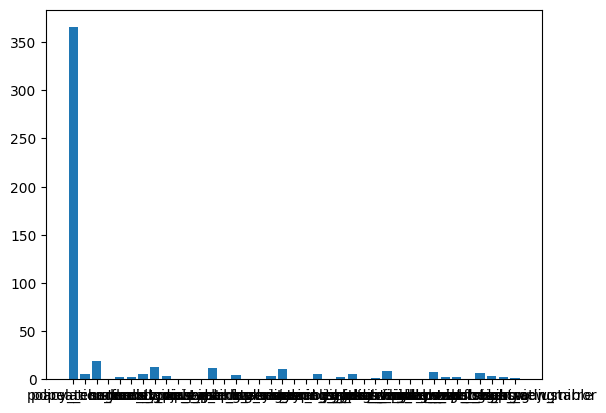



 Time taken to complete the k_select_best is:0.04944300651550293


In [357]:
x=fs.k_select_best(x,y,2,'classification')


In [358]:
# x_train,x_test,y_train,y_test=fs.corr_drop(x,y)
# x_train
x_train,x_test,y_train,y_test=fs.data_splitting(x,y)
x_train

,policy_tenure,area_cluster,population_density,segment,model,fuel_type,max_torque,max_power,is_adjustable_steering,is_parking_sensors,...,steering_type,length,width,is_front_fog_lights,is_brake_assist,is_power_door_locks,is_central_locking,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw
51111,1.027568,10,27742,2,7,2,0,6,1,1,...,0,3845,1735,1,1,1,1,1,1,1
77930,0.290363,1,73430,4,5,1,4,0,1,1,...,2,4300,1790,1,1,1,1,1,0,1
25128,0.113564,11,27003,2,7,2,0,6,1,1,...,0,3845,1735,1,1,1,1,1,1,1
69027,1.188956,16,21622,2,7,2,0,6,1,1,...,0,3845,1735,1,1,1,1,1,1,1
81002,1.155931,20,8794,3,10,1,2,8,1,1,...,0,3995,1695,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,0.574319,9,35036,1,9,0,6,3,0,1,...,2,3655,1620,0,0,1,1,0,0,1
45891,1.222731,21,17804,4,5,1,4,0,1,1,...,2,4300,1790,1,1,1,1,1,0,1
42613,0.031563,5,7788,2,7,2,0,6,1,1,...,0,3845,1735,1,1,1,1,1,1,1
43567,0.188213,17,34738,0,0,0,5,2,0,1,...,2,3445,1515,0,0,0,0,0,0,0


In [359]:
# x_train,x_test,y_train,y_test=fs.train_values()
# print(x_train.shape)

In [360]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix,f1_score

start_time=time.time()
model = RandomForestClassifier(n_estimators=100, random_state=0)  # Adjust hyperparameters as needed
model.fit(x_train, y_train)
end_time=time.time()
y_pred = model.predict(x_test)



cm=confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1=f1_score(y_test,y_pred)
time3=end_time-start_time
print(f'Training time for processed data is {time3}')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:",f1)
print("Confusion Matrix:", cm)

# print(f"\n################# Total Time Taken is:###################\n{time1+time2+time3}seconds")


Training time for processed data is 14.16699481010437
Accuracy: 0.638709089251527
Precision: 0.6371934521998418
Recall: 0.6385534821319673
F1: 0.6378727422253357
Confusion Matrix: [[10547  5962]
 [ 5927 10471]]


Training time for unprocessed data is 14.486703634262085
Accuracy: 0.9362749566961437
Precision: 0.9598096585428589
Recall: 0.9102329552384437
F1 score: 0.9343641428526714
Confusion Matrix: [[15884   625]
 [ 1472 14926]]

# Without Proper Preprocessing

In [361]:
data=pd.read_csv('./train_qWM28Yl.csv')
data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [362]:

clean=PreProcessor()
data,objects_columns,t1=clean.encoding(data)
data=data.dropna()
data

Encoding process completed! It returns df and Object-col-list
Execution time for encoding is 0.4205775260925293 seconds
Total Execution time for Preprocessing is 0.4205775260925293 seconds


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0,0.515874,0.05,0.644231,0,4990,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,0.672619,0.02,0.375000,11,27003,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,2,0.841110,0.02,0.384615,15,4076,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,3,0.900277,0.11,0.432692,16,21622,1,3,3,2,...,1,1,1,1,1,1,1,1,2,0
4,4,0.596403,0.11,0.634615,17,34738,2,0,4,2,...,0,1,1,1,0,1,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,58587,0.355089,0.13,0.644231,20,8794,2,0,4,2,...,0,1,1,1,0,1,1,1,2,0
58588,58588,1.199642,0.02,0.519231,5,7788,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
58589,58589,1.162273,0.05,0.451923,17,34738,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
58590,58590,1.236307,0.14,0.557692,20,8794,1,2,7,2,...,1,1,1,1,1,1,1,1,2,0


In [363]:
x=data.drop('is_claim',axis=1)
y=data['is_claim']
smote = SMOTE()
x, y= smote.fit_resample(x, y)
x_tr, x_t, y_tr, y_t = train_test_split(x, y, test_size=0.3, random_state=0)


In [364]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix,f1_score


start1_time=time.time()
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
model.fit(x_tr, y_tr)
end1_time=time.time()
y_pred = model.predict(x_t)

cm1=confusion_matrix(y_t,y_pred)
accurac = accuracy_score(y_t, y_pred)
precisio = precision_score(y_t, y_pred)
recal = recall_score(y_t, y_pred)
f1s=f1_score(y_t,y_pred)
t2=end1_time-start1_time
print(f'Training time for unprocessed data is {t2}')
print("Accuracy:", accurac)
print("Precision:", precisio)
print("Recall:", recal)
print("F1 score:",f1s)
print("Confusion Matrix:", cm1)

print(f"\n################# Total Time Taken is:###################\n{t1+t2}seconds")


Training time for unprocessed data is 14.350533723831177
Accuracy: 0.9379159449357279
Precision: 0.9585968947671075
Recall: 0.9149286498353457
F1 score: 0.9362538612749227
Confusion Matrix: [[15861   648]
 [ 1395 15003]]

################# Total Time Taken is:###################
14.771111249923706seconds


In [365]:
def constant_variance(data):
    print("Finding Constant Variance Columns...")
    constant_columns = []
    from sklearn.feature_selection import VarianceThreshold
    var_thres=VarianceThreshold(threshold=0)
    var_thres.fit(data)
    constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]]
    print(len(constant_columns))
    if constant_columns:
     for column in constant_columns:
         print(f'Total {len(constant_columns)} are being removed and the Columns are: {column}')
     data=data.drop(columns=constant_columns)
    else:
        print("No constant variance columns found.")
    return data

# Splitting the data into train and test    

In [366]:

def data_splitting(data, dependent_variable):
    print("Splitting of dataset into train and test...")
    from sklearn.model_selection import train_test_split
    
    X = data.drop(dependent_variable, axis=1)
    y = data[dependent_variable]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    result_dict = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }
     

    return result_dict


# Highly Correlated Feature Removal

In [367]:
def corr_drop(data,dependent_variable):
    result=data_splitting(data,dependent_variable)  # Data Splitting
    X_train=result['X_train']
    X_test=result['X_test']
    print(X_train)
    y_train=result['y_train']
    y_test=result['y_test']  
        
    # import seaborn as sns
    # import matplotlib.pyplot as plt 
    # import pandas as pd
    
    #Using Pearson Correlation
    plt.figure(figsize=(12,10))
    cor = X_train.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
    plt.show()
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i): # lower triangle of an matrix
            if (corr_matrix.iloc[i, j]) > 0.80: # we are interested in coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    print(f'Total {len(col_corr)} are being removed and the Columns are: {col_corr}')
    print(X_train)
    X_train=X_train.drop(col_corr,axis=1)
    X_test=X_test.drop(col_corr,axis=1)
    print(X_train.columns)
    
    return X_train,X_test,y_train,y_test

# CHI-SQUARE TEST

In [368]:
def chi2(data,dependent_variable,objects_columns):
    result=data_splitting(data,dependent_variable)  # Data Splitting
    X_train=result['X_train']
    y_train=result['y_train']
    X_train_objects = X_train[objects_columns]
    from sklearn.feature_selection import chi2
    f_p_values = chi2(X_train_objects, y_train)
    p_value = pd.Series(f_p_values[1])
    f_value=pd.Series(f_p_values[0])
    p_value.index=X_train_objects.columns
    f_value.index=X_train_objects.columns
        
    
        
    return p_value,f_value
        
    
    
 

In [369]:
p_value,f_value=chi2(data,'survived',objects_columns)

Splitting of dataset into train and test...


KeyError: "['survived'] not found in axis"

: 

In [ ]:
p_value.sort_values(ascending=True)

In [ ]:
f_value.sort_values(ascending=False)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

# Mutual Info Classification

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
mutual_info=mutual_info_classif(X,y)

In [ ]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False).plot(kind='barh')
plt.show()

In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X=data.drop('Price',axis=1)
y=data['Price']

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

In [ ]:
X_train.corr()

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.6)
len(set(corr_features))

In [ ]:
corr_features

In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
# from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

# Load dataset (Boston house prices dataset)
# data=pd.read_csv('./Dataset/titanic_data.csv')
X = data.drop('survived', axis=1)
y = data['survived']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute correlation matrix
correlation_matrix = data.corr()

# Compute mutual information
mutual_info = mutual_info_classif(X_scaled, y)

# Combine results
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Correlation_with_target': [correlation_matrix[column]['survived'] for column in X.columns],
    'Mutual_information_with_target': mutual_info
})

# Normalize rankings (optional)
feature_scores['Correlation_with_target_normalized'] = (feature_scores['Correlation_with_target'] - feature_scores['Correlation_with_target'].min()) / (feature_scores['Correlation_with_target'].max() - feature_scores['Correlation_with_target'].min())
feature_scores['Mutual_information_with_target_normalized'] = (feature_scores['Mutual_information_with_target'] - feature_scores['Mutual_information_with_target'].min()) / (feature_scores['Mutual_information_with_target'].max() - feature_scores['Mutual_information_with_target'].min())

# Combine rankings (simple average)
feature_scores['Combined_rank'] = (feature_scores['Correlation_with_target_normalized'] + feature_scores['Mutual_information_with_target_normalized']) / 2

# Select top features
top_features = feature_scores.sort_values(by='Combined_rank', ascending=False).head(5)

print("Top Features:")
print(top_features)


In [ ]:
top_features